In [1]:
import pandas as pd
from player import Player
from ratingscraper import *
from scorescraper import *
from estimation import *
from simulations import *

In [32]:
importlib.reload(sys.modules['simulations'])

<module 'simulations' from 'D:\\Code\\chess-predictor\\simulations.py'>

In [33]:
import simulations

## Generate players

In [2]:
# df = pd.read_csv('players.csv')
df = pd.read_csv('wcplayers.csv')

In [3]:
players = []
for x in df.iterrows():
    players.append(Player(x[1][0], x[1][1]))

## Web scraping

In [4]:
scrape_ratings(players)

In [5]:
players

[Bu Xiangzhi (2714),
 Peter Svidler (2756),
 Maxime Vachier-Lagrave (2804),
 Alexander Grischuk (2788),
 Vassily Ivanchuk (2727),
 Anish Giri (2777),
 Levon Aronian (2802),
 Daniil Dubov (2666),
 Wesley So (2792),
 Baadur Jobava (2702),
 Vladimir Fedoseev (2731),
 Maxim Rodshtein (2695),
 Evgeniy Najer (2694),
 Richard Rapport (2675),
 Wang Hao (2701),
 Ding Liren (2771)]

In [6]:
playerdict = {player.name: player for player in players}

In [7]:
scrape_scores(players)

Fetching head-to-head score between Bu Xiangzhi and Bu Xiangzhi
Fetching head-to-head score between Bu Xiangzhi and Peter Svidler
Fetching head-to-head score between Bu Xiangzhi and Maxime Vachier-Lagrave
Fetching head-to-head score between Bu Xiangzhi and Alexander Grischuk
Fetching head-to-head score between Bu Xiangzhi and Vassily Ivanchuk
Fetching head-to-head score between Bu Xiangzhi and Anish Giri
Fetching head-to-head score between Bu Xiangzhi and Levon Aronian
Fetching head-to-head score between Bu Xiangzhi and Daniil Dubov
Fetching head-to-head score between Bu Xiangzhi and Wesley So
Fetching head-to-head score between Bu Xiangzhi and Baadur Jobava
Fetching head-to-head score between Bu Xiangzhi and Vladimir Fedoseev
Fetching head-to-head score between Bu Xiangzhi and Maxim Rodshtein
Fetching head-to-head score between Bu Xiangzhi and Evgeniy Najer
Fetching head-to-head score between Bu Xiangzhi and Richard Rapport
Fetching head-to-head score between Bu Xiangzhi and Wang Hao


The scrape_scores() function takes a while to run, because it has to send a request to chessgames.com's slow search. The time complexity is O(n^2), which means it will become significantly faster as the World Cup progresses.

## Simulations

We simulate one World Cup and print out the results by setting the verbosity flag to 1.

In [8]:
W = 10
verbosity = 1
simulate_worldcup(players, 4, W, verbosity)

----------
Round 4
----------
Match Bu Xiangzhi (2714) vs. Peter Svidler (2756)
Game 1: Classical
Draw
Game 2: Classical
Bu Xiangzhi won
Bu Xiangzhi (2714) won the match
Match Maxime Vachier-Lagrave (2804) vs. Alexander Grischuk (2788)
Game 1: Classical
Maxime Vachier-Lagrave won
Game 2: Classical
Draw
Maxime Vachier-Lagrave (2804) won the match
Match Vassily Ivanchuk (2727) vs. Anish Giri (2777)
Game 1: Classical
Vassily Ivanchuk won
Game 2: Classical
Vassily Ivanchuk won
Vassily Ivanchuk (2727) won the match
Match Levon Aronian (2802) vs. Daniil Dubov (2666)
Game 1: Classical
Levon Aronian won
Game 2: Classical
Levon Aronian won
Levon Aronian (2802) won the match
Match Wesley So (2792) vs. Baadur Jobava (2702)
Game 1: Classical
Baadur Jobava won
Game 2: Classical
Wesley So won
Game 3: Rapid
Wesley So won
Game 4: Rapid
Wesley So won
Wesley So (2792) won the match
Match Vladimir Fedoseev (2731) vs. Maxim Rodshtein (2695)
Game 1: Classical
Vladimir Fedoseev won
Game 2: Classical
Vladimi

Levon Aronian (2802)

Now we run 10,000 simulations instead (without printing!) and display the results.

In [8]:
N = 10000
W = 10
verbosity = 0
simulated_players = worldcup_simulations(players, 3, N, W, verbosity)
for player in simulated_players:
    print(player, round(player.win_percentage*100, 3), "%")

Wesley So (2792) 23.47 %
Levon Aronian (2802) 17.82 %
Maxime Vachier-Lagrave (2804) 16.11 %
Ding Liren (2771) 7.85 %
Alexander Grischuk (2788) 7.69 %
Peter Svidler (2756) 6.4 %
Anish Giri (2777) 5.36 %
Vassily Ivanchuk (2727) 4.43 %
Vladimir Fedoseev (2731) 4.11 %
Wang Hao (2701) 2.96 %
Richard Rapport (2675) 1.34 %
Evgeniy Najer (2694) 0.65 %
Bu Xiangzhi (2714) 0.6 %
Maxim Rodshtein (2695) 0.57 %
Baadur Jobava (2702) 0.39 %
Daniil Dubov (2666) 0.25 %


## Plotting

In [10]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [11]:
def plot_winner_predictions(players):
    names = [player.name.split(" ")[-1] for player in players]
    win_percentages = [player.win_percentage for player in players]
    player_df = pd.DataFrame({"Name": names, "Win percentage": win_percentages})

    matplotlib.rcParams['figure.figsize'] = (16, 10)
    matplotlib.rcParams['font.size'] = 40
    sns.barplot(x="Name", y="Win percentage", data=player_df[player_df["Win percentage"]>0.01]).set_title("World Cup 2017 Winner Predictions")

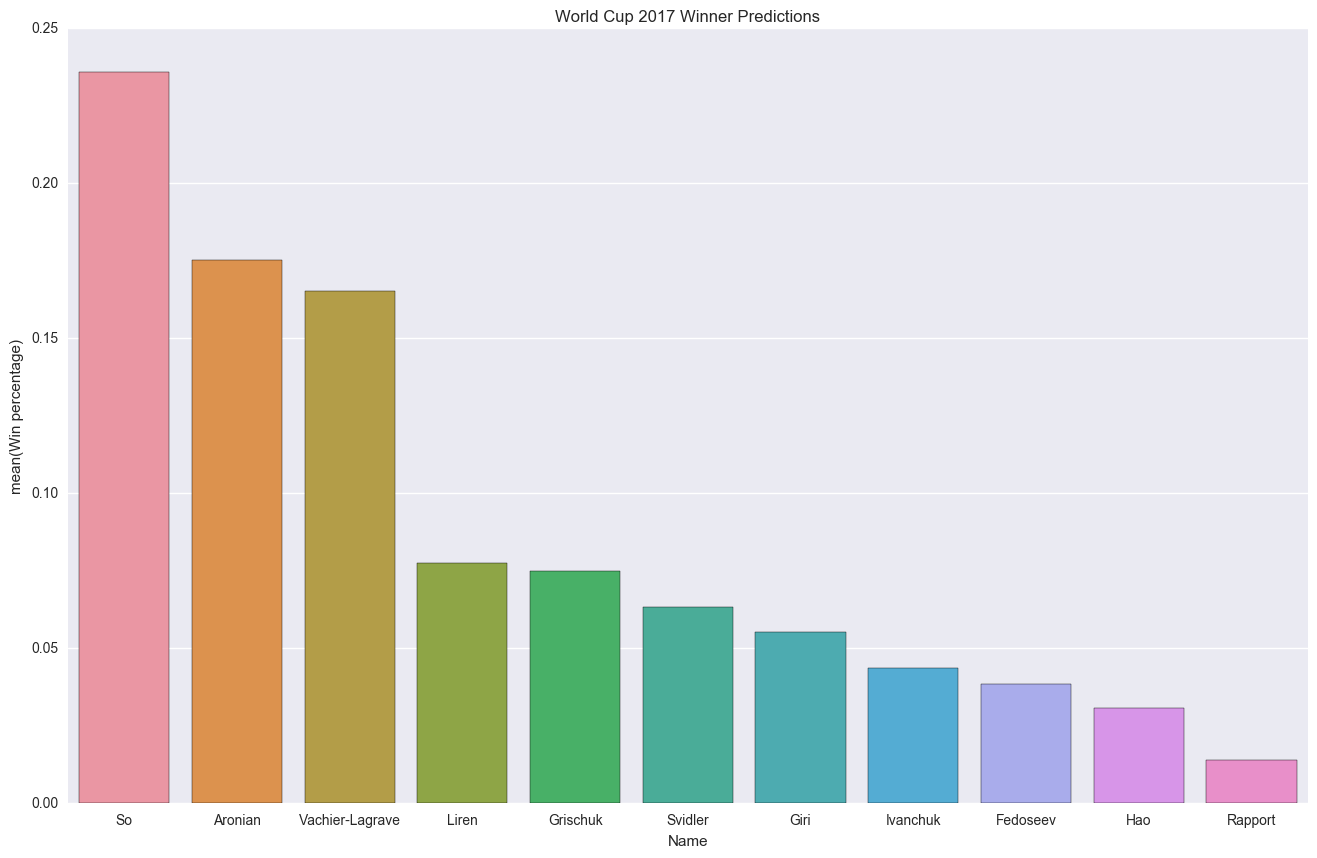

In [12]:
plot_winner_predictions(simulated_players)

This sets the current round scores of the players:

In [12]:
N = 10000
W = 10
verbosity = 0
simulated_players = worldcup_simulations(players, 3, N, W, verbosity)
for player in simulated_players:
    print(player, round(player.win_percentage*100, 3), "%")

Wesley So (2792) 23.14 %
Levon Aronian (2802) 16.05 %
Maxime Vachier-Lagrave (2804) 15.39 %
Vassily Ivanchuk (2727) 10.08 %
Alexander Grischuk (2788) 8.08 %
Peter Svidler (2756) 6.61 %
Ding Liren (2771) 6.18 %
Vladimir Fedoseev (2731) 5.94 %
Wang Hao (2701) 3.4 %
Richard Rapport (2675) 1.75 %
Anish Giri (2777) 1.44 %
Bu Xiangzhi (2714) 0.74 %
Evgeniy Najer (2694) 0.4 %
Daniil Dubov (2666) 0.39 %
Baadur Jobava (2702) 0.34 %
Maxim Rodshtein (2695) 0.07 %


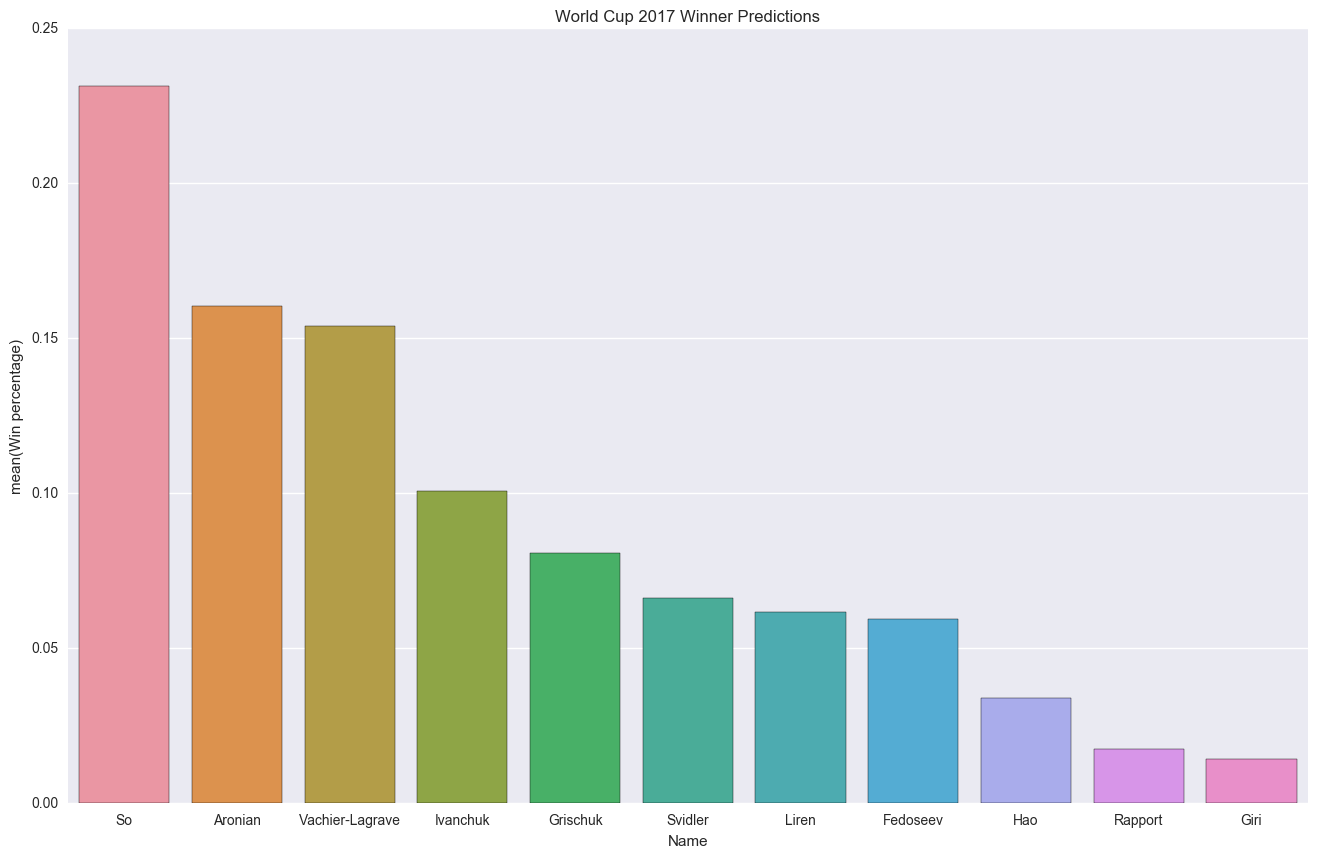

In [13]:
plot_winner_predictions(simulated_players)

In [14]:
playerdict["Bu Xiangzhi"].current_score = 0.5
playerdict["Levon Aronian"].current_score = 0.5
playerdict["Daniil Dubov"].current_score = 0.5
playerdict["Vladimir Fedoseev"].current_score = 1
playerdict["Baadur Jobava"].current_score = 0.5
playerdict["Maxim Rodshtein"].current_score = 0
playerdict["Vassily Ivanchuk"].current_score = 1
playerdict["Wang Hao"].current_score = 0.5
playerdict["Evgeniy Najer"].current_score = 0.5
playerdict["Alexander Grischuk"].current_score = 0.5
playerdict["Richard Rapport"].current_score = 0.5
playerdict["Anish Giri"].current_score = 0
playerdict["Wesley So"].current_score = 0.5
playerdict["Peter Svidler"].current_score = 0.5
playerdict["Maxime Vachier-Lagrave"].current_score = 0.5
playerdict["Ding Liren"].current_score = 0.5

In [16]:
worldcup_match_simulations(playerdict["Wang Hao"], playerdict["Ding Liren"], W, 10000, 0)

Wang Hao (2701) 0.491
Ding Liren (2771) 0.509


In [17]:
worldcup_match_simulations(playerdict["Bu Xiangzhi"], playerdict["Peter Svidler"], W, 10000, 0)

Bu Xiangzhi (2714) 0.2834
Peter Svidler (2756) 0.7166


In [18]:
worldcup_match_simulations(playerdict["Maxime Vachier-Lagrave"], playerdict["Alexander Grischuk"], W, 10000, 0)

Maxime Vachier-Lagrave (2804) 0.5559
Alexander Grischuk (2788) 0.4441


In [19]:
worldcup_match_simulations(playerdict["Vassily Ivanchuk"], playerdict["Anish Giri"], W, 10000, 0)

Vassily Ivanchuk (2727) 0.8535
Anish Giri (2777) 0.1465


In [20]:
worldcup_match_simulations(playerdict["Daniil Dubov"], playerdict["Levon Aronian"], W, 10000, 0)

Daniil Dubov (2666) 0.1832
Levon Aronian (2802) 0.8168


In [21]:
worldcup_match_simulations(playerdict["Wesley So"], playerdict["Baadur Jobava"], W, 10000, 0)

Wesley So (2792) 0.8216
Baadur Jobava (2702) 0.1784


In [22]:
worldcup_match_simulations(playerdict["Maxim Rodshtein"], playerdict["Vladimir Fedoseev"], W, 10000, 0)

Maxim Rodshtein (2695) 0.044
Vladimir Fedoseev (2731) 0.956


In [23]:
worldcup_match_simulations(playerdict["Evgeniy Najer"], playerdict["Richard Rapport"], W, 10000, 0)

Evgeniy Najer (2694) 0.3705
Richard Rapport (2675) 0.6295
